### Sales Analysis


In [1]:
import pandas as pd

In [11]:
# Merge 12 months data into a single CSV file
df2 = pd.read_csv('Sales_Data/Sales_April_2019.csv')

df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
from os import listdir
mypath = 'Sales_Data/'
files = [f for f in listdir(mypath)]

In [12]:
df = pd.concat([pd.read_csv(mypath+f) for f in files])
df.head()
df.shape

(186850, 6)

In [13]:
df.to_csv('all_data.csv',index=False)

In [17]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean data

In [66]:
# Clean data for NaN values

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data.dropna(inplace=True)
all_data.shape # 186305

# Clean data for Junk values having row values the same as column name
junk = all_data[all_data['Order Date'] == 'Order Date']
all_data.drop(junk.index,inplace=True)
all_data.shape

(185950, 7)

In [186]:
# Add columns
date = all_data['Order Date']
all_data['Month'] = date.str[0:2].astype('int32')
all_data['Day'] = date.str[3:5].astype('int32')
#all_data.drop(columns=['index'],inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,11.99,Los Angeles


In [187]:
# Add a sales column
all_data['Sales'] = pd.to_numeric(all_data['Price Each'])* pd.to_numeric(all_data['Quantity Ordered'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,11.99,Los Angeles


In [161]:
## Best month for sales. How much earned?

monthwise_data = all_data.groupby(['Month']).sum()

highest = monthwise_data[['Sales']].sort_values('Sales', ascending=False)[:1]
highest.index[0] , highest.iloc[0][0]


(12, 4613443.34)

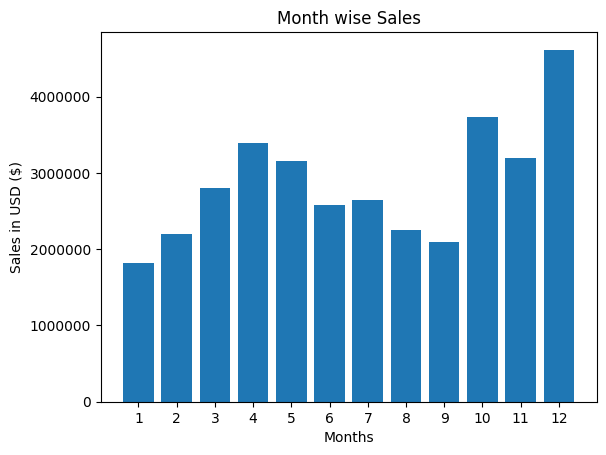

In [252]:
#monthwise_data[['Price Each']].plot(kind='bar',ylabel='Price in 1e6')

from matplotlib import pyplot as plt

plt.bar(monthwise_data.index, monthwise_data['Sales'])

plt.title('Month wise Sales')
plt.xticks(monthwise_data.index)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(style='plain')
plt.show()

##### Which city had the highest number of sales

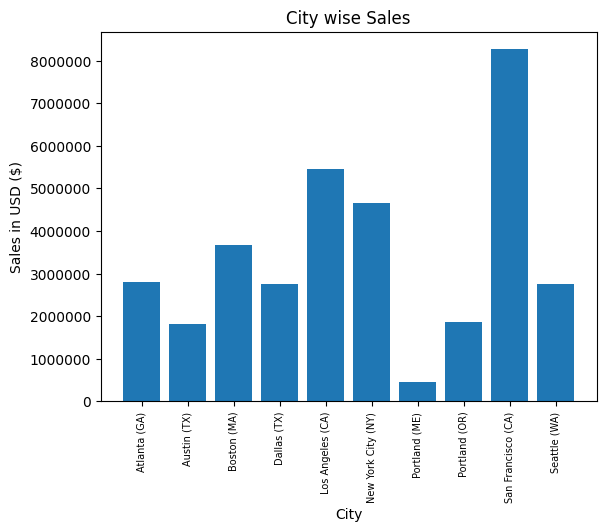

In [258]:
# add new column for city

def get_city(address):
    return str(address).split(',')[1].strip() + ' (' + get_state(address) + ')'

def get_state(address):
    return str(address).split(',')[2].split()[0]

all_data['City'] = all_data['Purchase Address'].apply(get_city)
all_data['State'] = all_data['Purchase Address'].apply(get_state)

city_data = all_data.groupby(['City']).sum()

plt.bar(city_data.index, city_data['Sales'])
plt.title('City wise Sales')
plt.xticks(city_data.index, rotation='vertical',size=7) # another option for index [c for c,df in all_data.groupby(['City'])]
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [254]:
city_data

,Price Each,Month,Day,Sales
City,,,,
Atlanta (GA),2779908.20,104794,234837,2795498.58
Austin (TX),1809873.61,69829,156782,1819581.75
Boston (MA),3637409.77,141112,312376,3661642.01
Dallas (TX),2752627.82,104620,234435,2767975.40
Los Angeles (CA),5421435.23,208325,469607,5452570.80
New York City (NY),4635370.83,175741,392706,4664317.43
Portland (ME),447189.25,17144,38288,449758.27
Portland (OR),1860558.22,70621,159233,1870732.34
San Francisco (CA),8211461.74,315520,702669,8262203.91


##### Best time to display ads to increase customer purchase likelihood?

In [266]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [289]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,23.90,Dallas (TX),TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,7,99.99,Boston (MA),MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,Los Angeles (CA),CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,Los Angeles (CA),CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,11.99,Los Angeles (CA),CA,9,27


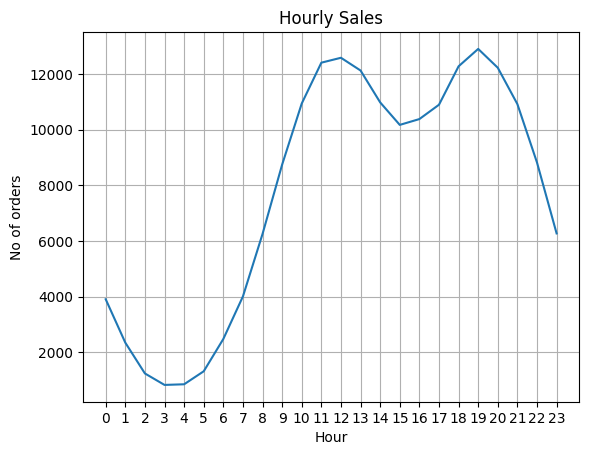

In [294]:
hour_data = all_data.groupby(['Hour']).count()

plt.plot(hour_data.index, hour_data['Sales'])
plt.title('Hourly Sales')
plt.xticks(hour_data.index) # another option for index [c for c,df in all_data.groupby(['City'])]
plt.grid()
plt.xlabel('Hour')
plt.ylabel('No of orders')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

# Best time to display ads around 11 am or 7 pm (19)

#### Products often sold together

In [336]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] # Method to handle dropping duplicates, False doesn't drop if duplicates found

df['Bought Together'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()


c:\Users\windows\anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Sales,City,State,Hour,Minute,Bought Together
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,Los Angeles (CA),CA,14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,Los Angeles (CA),CA,14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,3,600.00,Los Angeles (CA),CA,19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,3,11.95,Los Angeles (CA),CA,19,42,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,7,99.99,Boston (MA),MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [ ]:
prod_dic = {}
def counter_dic(products):
    prods = set(products.split(','))

    for p in prods:
        for s in prods-set([p]):
            prod_dic[p+","+s] = prod_dic.get(p+","+s, 0)+1

# df['Bought Together'].apply(counter_dic)
for row in df['Bought Together']:
    counter_dic(row)

sorted(prod_dic.items(), key=lambda x: x[1],reverse=True)

In [404]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Bought Together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) # Most commonly paired together items (can change to 3,4... )

for k, v in count.most_common(5):
    print(k,v)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799


#### Most ordered product

In [409]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
product_data = all_data.groupby('Product').sum()
product_data.sort_values(by='Quantity Ordered', ascending=False).head()

,Quantity Ordered,Price Each,Month,Day,Sales,Hour,Minute
Product,,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,326283,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,325504,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,345452,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,341405,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,297276,246478.43,271720,554023


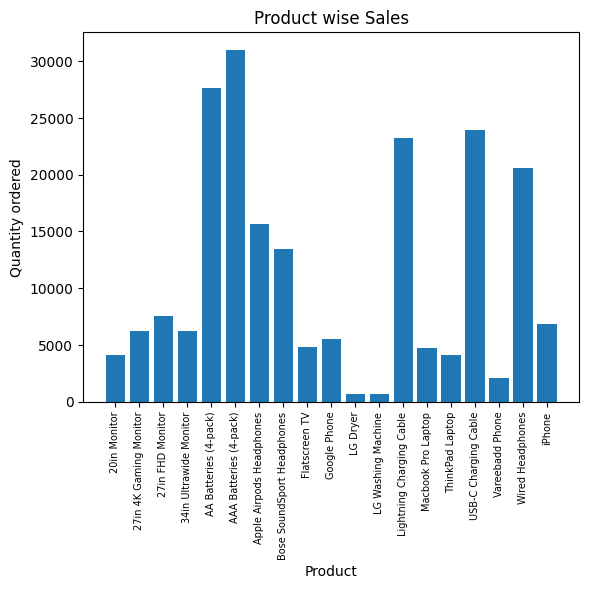

In [411]:
plt.bar(product_data.index, product_data['Quantity Ordered'])
plt.title('Product wise Sales')
plt.xticks(product_data.index, rotation='vertical',size=7) # another option for index [c for c,df in all_data.groupby(['City'])]
plt.xlabel('Product')
plt.ylabel('Quantity ordered')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

c:\Users\windows\anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


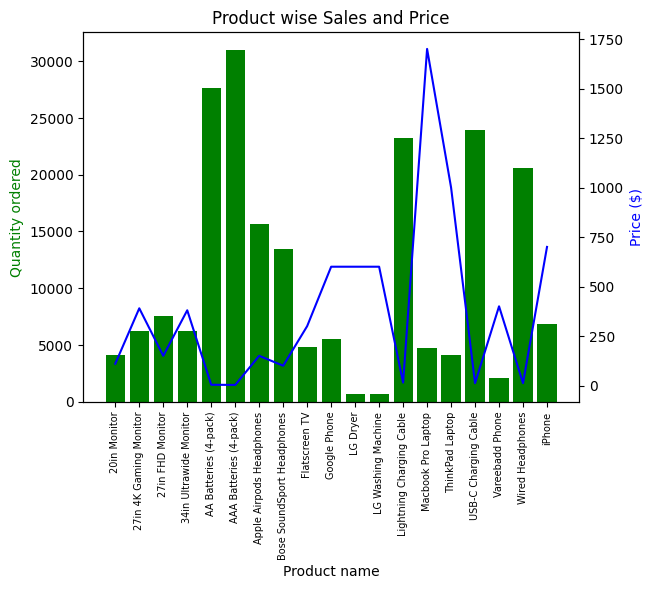

In [414]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
plt.title('Product wise Sales and Price')
ax1.bar(product_data.index,product_data['Quantity Ordered'], color = 'g')
ax2.plot(product_data.index,prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity ordered',color = 'g')

ax2.set_ylabel('Price ($)',color = 'b')
ax1.set_xticklabels(product_data.index,rotation='vertical',size=7)

plt.show()